In [1]:
import numpy as np
import os.path as path
from scipy.constants import c

from optic.core import parameters
from optic.tx import simpleWDMTx
from optic.amplification import edfaSM, wdmAnlysr, OSA

#import logging as logg
#logg.getLogger().setLevel(logg.INFO)
#logg.basicConfig(format='%(message)s')

In [2]:
from IPython.core.display import HTML
from IPython.core.pylabtools import figsize

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
figsize(10, 3)

In [4]:
# EDFA parameters
param_edfa = parameters()
param_edfa.type     = "AGC"
param_edfa.value    = 20 #dB
param_edfa.forPump  = {'pump_signal': np.array([100e-3]), 'pump_lambda': np.array([980e-9])}
param_edfa.bckPump  = {'pump_signal': np.array([000e-3]), 'pump_lambda': np.array([980e-9])}
param_edfa.file     = 'giles_MP980.dat'
param_edfa.fileunit = 'nm'
param_edfa.gmtc     = 'Bessel'
param_edfa.tol      = 0.05
param_edfa.tolCtrl  = 0.5

In [5]:
if 'google.colab' in str(get_ipython()):  
  param_edfa.file = path.join(path.abspath(path.join("../")), 'OptiCommPy', 'optic', 'ampParams', param_edfa.file)
else:
  param_edfa.file = path.join(path.abspath(path.join("../")), 'optic', 'ampParams', param_edfa.file)

In [6]:
# Transmitter parameters:
paramTx = parameters()
paramTx.M   = 4             # order of the modulation format
paramTx.Rs  = 40e9          # symbol rate [baud]
paramTx.SpS = 256           # samples per symbol
paramTx.Nbits = 2**10       # total number of bits per polarization
paramTx.pulse = 'rrc'       # pulse shaping filter
paramTx.Ntaps = 1024        # number of pulse shaping filter coefficients
paramTx.alphaRRC = 0.01     # RRC rolloff
paramTx.Pch_dBm = -15       # power per WDM channel [dBm]
paramTx.Nch     = 40        # number of WDM channels
paramTx.Fc      = c/1550e-9 # central optical frequency of the WDM spectrum
paramTx.freqSpac = 200e9    # WDM grid spacing
paramTx.Nmodes = 2          # number of signal modes [2 for polarization multiplexed signals]

In [7]:
# generate WDM signal
sigWDM_Tx, symbTx_, paramTx = simpleWDMTx(paramTx)

  0%|          | 0/40 [00:00<?, ?it/s]

In [8]:
lenFrqSg,isy = np.shape(sigWDM_Tx)
Fs = paramTx.Rs*paramTx.SpS
simOpticalBand = (Fs*(c/paramTx.Fc)**2)/c

(-100.0, 0.0)

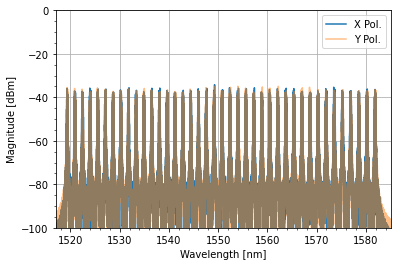

In [9]:
ax = OSA(sigWDM_Tx, Fs, paramTx.Fc)
ax.set_xlim([1517,1585])
ax.set_ylim([-100,0])

,Wav. [nm],Freq. [Thz],Spacing [THz],Power [dBm],Noise [dBm],OSNR [dB]
Channel,,,,,,
0,1578.582372,189.912458,203.359375,-46.877106,-90.275351,43.398246
1,1576.893824,190.115817,203.359375,-46.952274,-90.449961,43.497687
2,1575.261910,190.312770,196.953125,-46.663052,-90.337726,43.674675
3,1573.601750,190.513552,200.781250,-47.345427,-93.593876,46.248449
4,1571.954100,190.713239,199.687500,-46.763191,-91.763215,45.000024
5,1570.302186,190.913864,200.625000,-47.008979,-89.780742,42.771763
6,1568.655023,191.114333,200.468750,-47.241990,-94.179899,46.937909
7,1567.027949,191.312770,198.437500,-47.313085,-94.318186,47.005101
8,1565.378065,191.514411,201.640625,-47.212285,-89.728000,42.515715


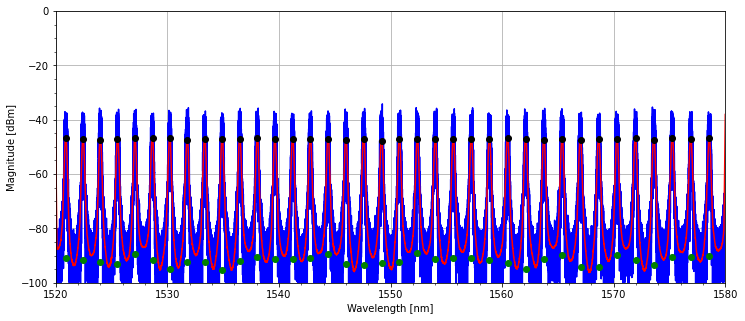

In [11]:
wdmAnlysr(sigWDM_Tx[:,0], Fs, paramTx.Fc)

In [16]:
# information TX
pwrTx = 1000*np.sum(np.mean(sigWDM_Tx * np.conj(sigWDM_Tx), axis = 0).real)
print('Sample rate [THz]: %5.3f' %(1e-12*Fs))
print('Time window [ns]:  %5.3f' %(1e9*lenFrqSg/Fs))
print('Central wavelength [nm]: %6.2f' %(1e9*c/paramTx.Fc))
print('Simulation window  [nm]: %f - [%6.2f nm - %6.2f nm]' 
      %(1e9*simOpticalBand, 1e9*(c/paramTx.Fc-simOpticalBand/2), 1e9*(c/paramTx.Fc+simOpticalBand/2)))
print('Frequency spacing [GHz]: %f' %(1e-9*Fs/lenFrqSg))
print('Number of points: %d' %(lenFrqSg))
print('Number of modes: %d' %(paramTx.Nmodes))
print('Average power - TX [mW] : %.3f mW' %(pwrTx))
print('Average power - TX [dBm] : %.3f dBm' %(10*np.log10(pwrTx)))

Sample rate [THz]: 10.240
Time window [ns]:  12.800
Central wavelength [nm]: 1550.00
Simulation window  [nm]: 82.062104 - [1508.97 nm - 1591.03 nm]
Frequency spacing [GHz]: 0.078125
Number of points: 131072
Number of modes: 2
Average power - TX [mW] : 1.265 mW
Average power - TX [dBm] : 1.021 dBm


In [13]:
#%load_ext line_profiler
#%lprun -f edfaSM edfaSM(sigWDM_Tx, Fs, paramTx.Fc, param_edfa)
# amplification
Eout, PumpF, PumpB = edfaSM(sigWDM_Tx, Fs, paramTx.Fc, param_edfa)

In [18]:
# information amp
rx_pw = 1000*np.sum(np.mean(Eout * np.conj(Eout), axis = 0).real)
print('Forward pump  - [mW] : %.3f' %(1e3*PumpF[0]))
print('Backward pump - [mW] : %.3f' %(1e3*PumpB[1]))
print('Average power - RX amp [mW] : %.3f' %(rx_pw))
print('Average power - RX amp [dBm] : %.3f' %(10*np.log10(rx_pw)))
print('Gain [dB]: %.3f' %(10*np.log10(rx_pw/pwrTx)))

Forward pump  - [mW] : 222.464
Backward pump - [mW] : 0.000
Average power - RX amp [mW] : 114.870
Average power - RX amp [dBm] : 20.602
Gain [dB]: 19.581


(-100.0, 0.0)

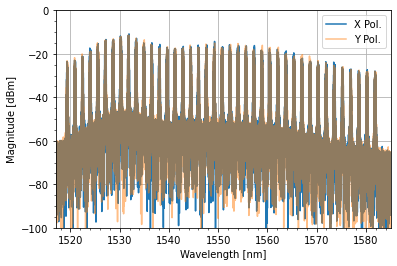

In [19]:
ax = OSA(Eout, Fs, paramTx.Fc)
ax.set_xlim([1517,1585])
ax.set_ylim([-100,0])